<a href="https://colab.research.google.com/github/MKPadmavathi/unp-assignments/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [9]:
df = pd.read_csv('/content/garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [11]:
df.shape

(1197, 15)

In [12]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [13]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [14]:
df['date'].dtype == 'object'

True

In [16]:
#Changing date column type to datetime64
df['date'] = pd.to_datetime(df['date'])


dtype('<M8[ns]')

In [17]:
df['date'].dtype

dtype('<M8[ns]')

In [18]:
#Setting date column as index
df.set_index('date', inplace=True)


In [19]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [20]:
#Filling WIP NaN values using interpolate(time) method
df['wip'].interpolate(method='time',inplace=True)


In [21]:
df[['wip']].head()

,wip
date,
2015-01-01,1108.0
2015-01-01,795.0
2015-01-01,968.0
2015-01-01,968.0
2015-01-01,1170.0


In [22]:
df['wip'].isna().sum()



0

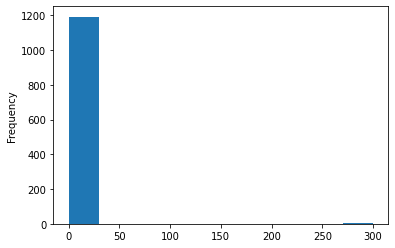

In [23]:
df['idle_time'].plot(kind='hist')
plt.show()

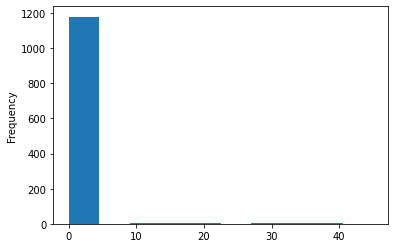

In [24]:
df['idle_men'].plot(kind='hist')
plt.show()

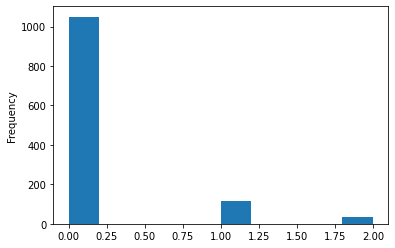

In [25]:
df['no_of_style_change'].plot(kind='hist')
plt.show()

In [26]:
#Dropping 'idle_men', 'idle_time' and 'no_of_style_change' columns because high frequency in 0 values
df.drop(['idle_men', 'idle_time','no_of_style_change'], axis=1,inplace=True)
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity
date,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,59.0,0.940725
2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,795.0,960,0,8.0,0.886500
2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,56.0,0.800382


In [27]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [28]:
df['department'] = df['department'].str.replace(' ','')
df['department'].unique()

array(['sweing', 'finishing'], dtype=object)

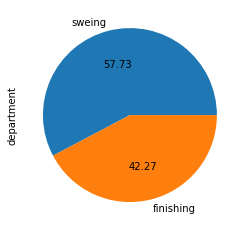

In [29]:
df['department'].value_counts().plot(kind='pie', autopct="%.2f")
plt.show()

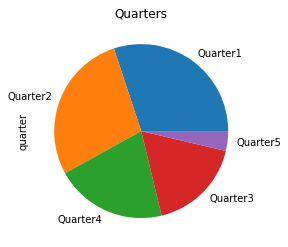

In [30]:
plt.title("Quarters")
df['quarter'].value_counts().plot(kind='pie')
plt.show()

In [31]:
quarters = df['quarter'].unique()

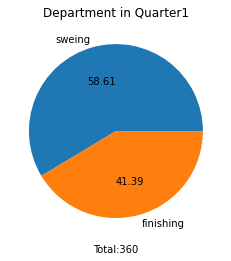

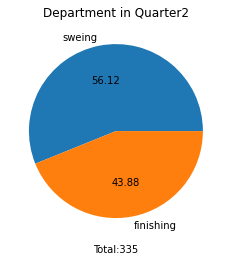

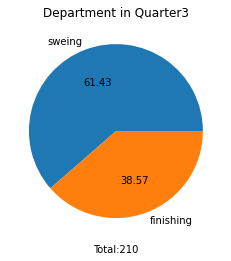

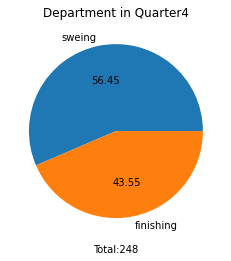

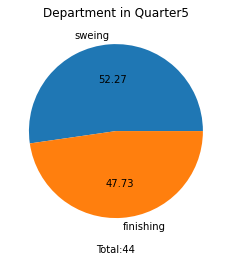

In [32]:
#Department in each Quarter
for quarter in quarters:
    qcounter = df['department'][df['quarter'] == quarter].value_counts()
    plt.pie(qcounter, autopct="%.2f", labels=qcounter.keys())
    plt.title(f"Department in {quarter}")
    plt.xlabel(f"Total:{sum(qcounter)}")
    plt.show()
    print("\n")

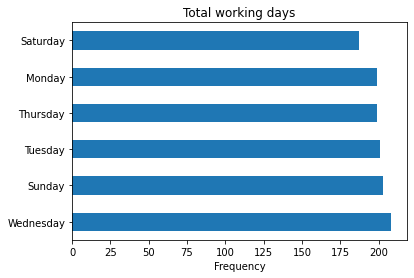

In [33]:
#Total working days
df['day'].value_counts().plot(kind='barh')
plt.title("Total working days")
plt.xlabel('Frequency')
plt.show()

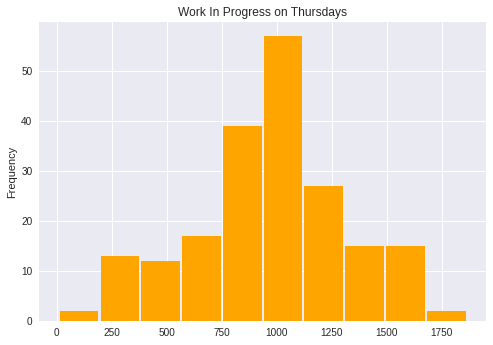

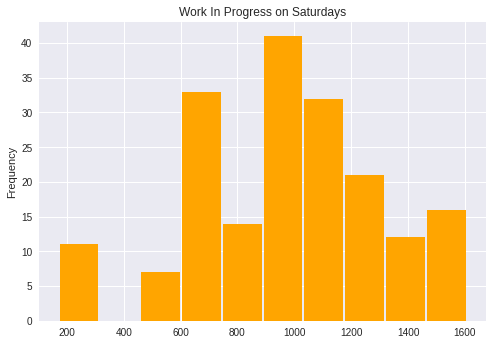

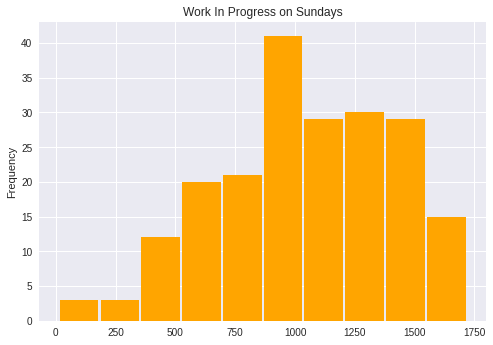

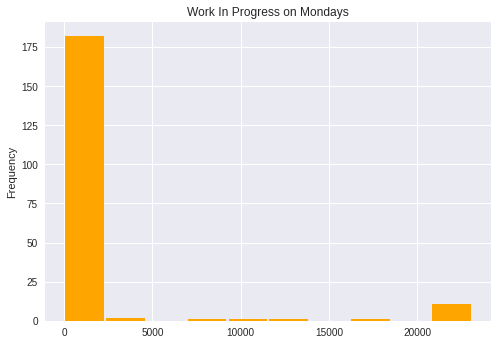

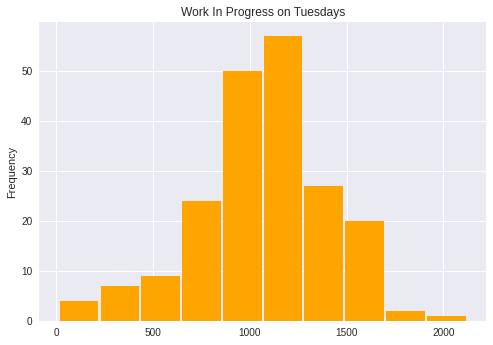

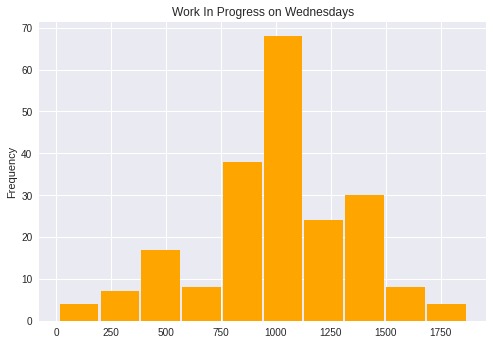

In [34]:
#Work In Progress(WIP) on week days
days = df['day'].unique()
for day in days:
    plt.style.use('seaborn')
    plt.title(f"Work In Progress on {day}s")
    wip_day = df['wip'][df['day'] == day]
    wip_day.plot(kind="hist", rwidth=0.95, color='orange')
    plt.show()

In [35]:
#Targeted productivity vs Actual productivity
t_vs_a = ['targeted_productivity', 'actual_productivity']
df[t_vs_a].describe()

,targeted_productivity,actual_productivity
count,1197.000000,1197.000000
mean,0.729632,0.735091
std,0.097891,0.174488
min,0.070000,0.233705
25%,0.700000,0.650307
50%,0.750000,0.773333
75%,0.800000,0.850253
max,0.800000,1.120437


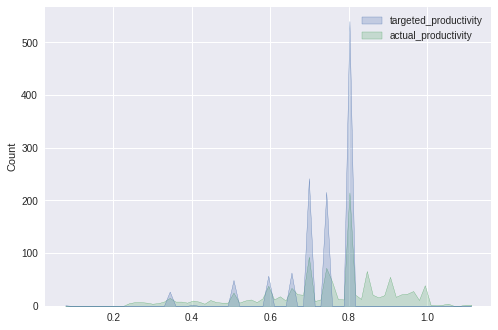

In [36]:
sns.histplot(data=df[['targeted_productivity', 'actual_productivity']], element='poly')
plt.show()

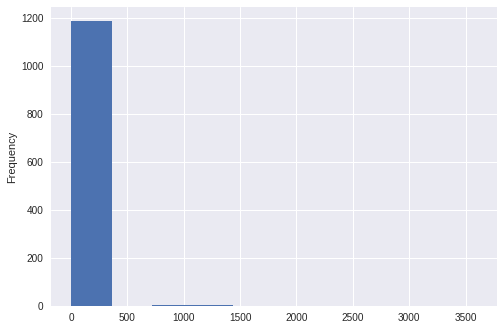

In [37]:
#Analysis on incentives
df['incentive'].plot(kind='hist')
plt.show()

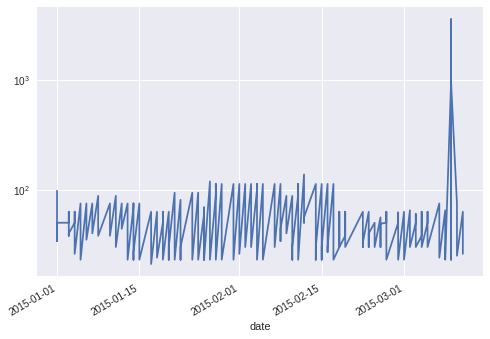

In [38]:
#If Incentives > 0
df['incentive'][df['incentive']>0].plot(kind='line')
plt.yscale('log')
plt.show()

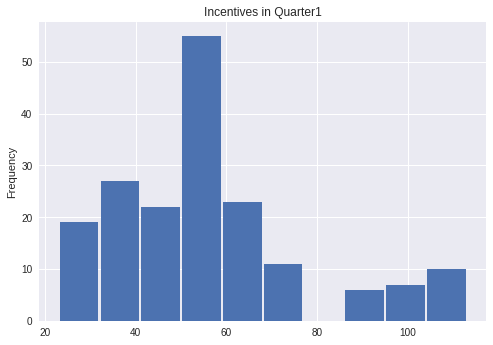

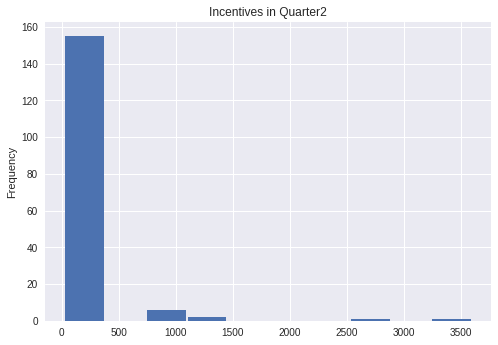

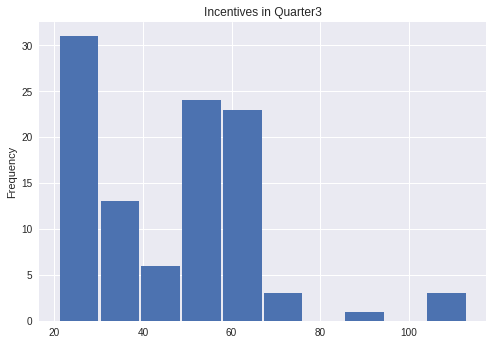

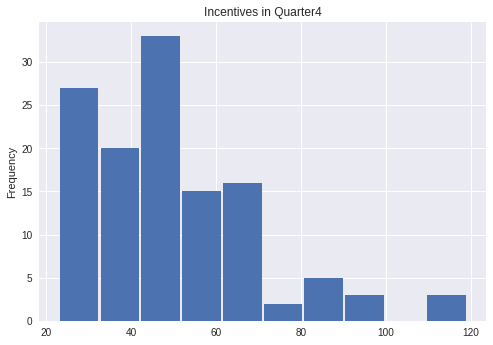

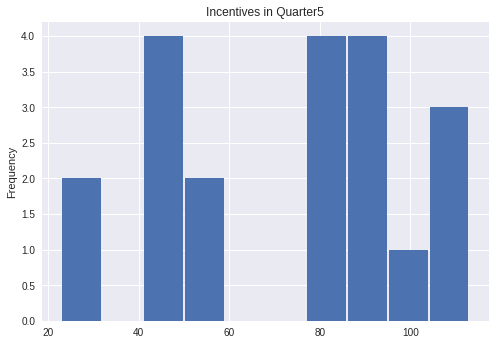

In [39]:
#Incentives per Quarter
for quarter in quarters:
    plt.title(f"Incentives in {quarter}")
    df['incentive'][(df['quarter'] == quarter) & (df['incentive']>0)].plot(kind='hist', rwidth=0.95)
    plt.show()
    print('\n')

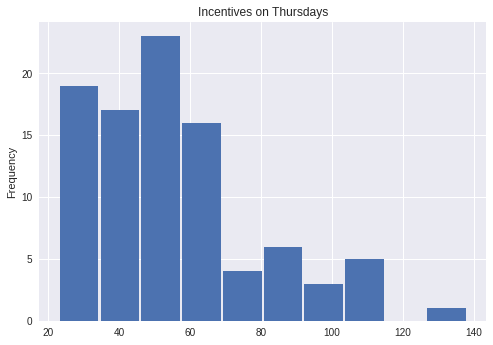

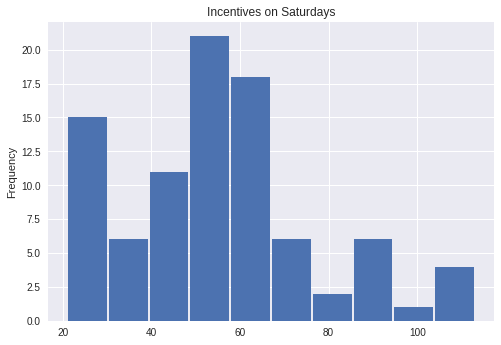

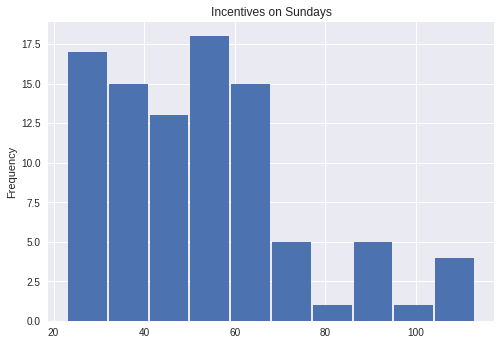

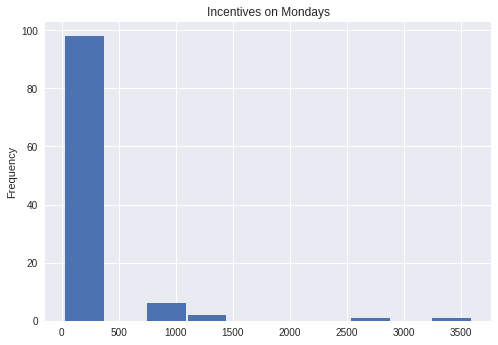

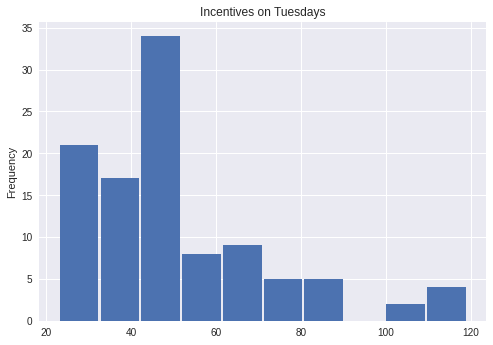

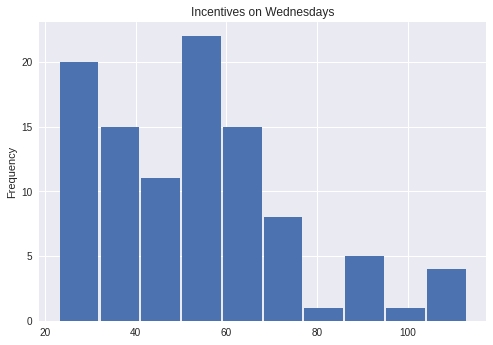

In [40]:
#Incentives per weekdays
for day in days:
    plt.title(f"Incentives on {day}s")
    df['incentive'][(df['day'] == day) & (df['incentive']>0)].plot(kind='hist', rwidth=0.95)
    plt.show()
    print('\n')

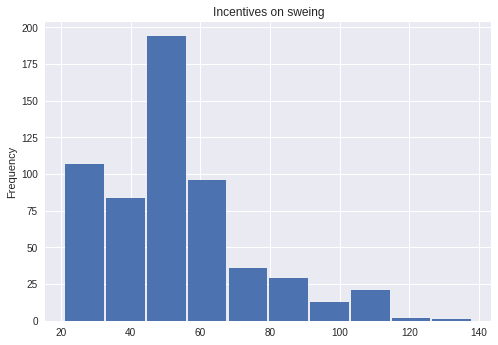

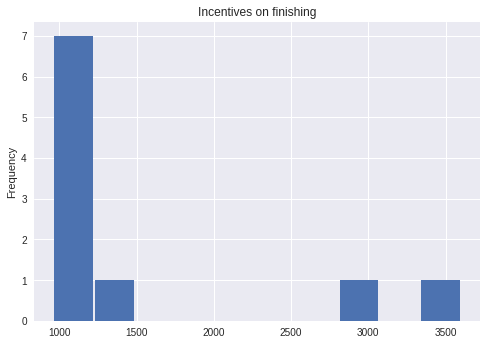

In [41]:
#Incentives for sweing vs Incentives for finishing
depts = df['department'].unique()
for dept in depts:
    plt.title(f"Incentives on {dept}")
    df['incentive'][(df['department'] == dept) & (df['incentive']>1)].plot(kind='hist', rwidth=0.95)
    plt.show()
    print('\n')  

As a result Finishing department gets high icentives than Sweing department

In [42]:
#Team and Over time
x_axis = df['team'].unique()


In [43]:
y_axis=[]
for val in x_axis:
    y_axis.append(df['over_time'][df['team'] == val].mean())

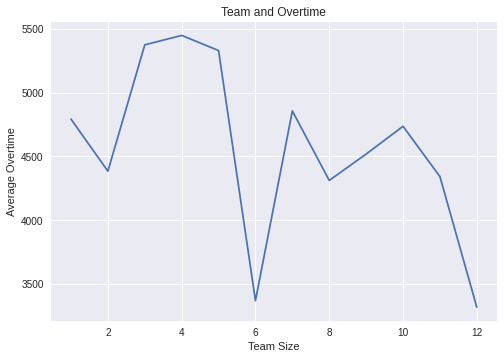

In [44]:
sns.lineplot(x=x_axis, y=y_axis)
plt.title("Team and Overtime")
plt.xlabel('Team Size')
plt.ylabel('Average Overtime')
plt.show()